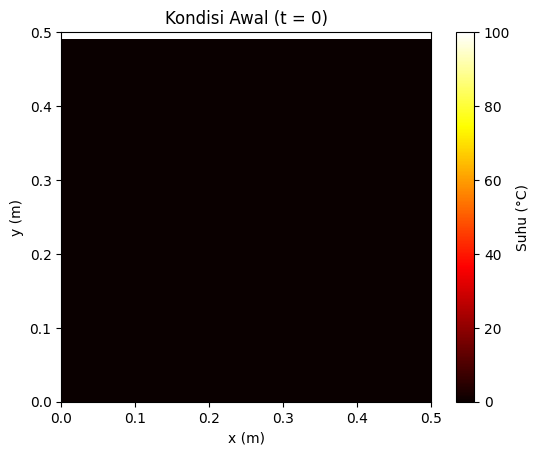

<ipython-input-1-619b049c3953>:36: RuntimeWarning: overflow encountered in double_scalars
  (Tn[i + 1, j] - 2 * Tn[i, j] + Tn[i - 1, j]) / dx**2 +
<ipython-input-1-619b049c3953>:37: RuntimeWarning: overflow encountered in double_scalars
  (Tn[i, j + 1] - 2 * Tn[i, j] + Tn[i, j - 1]) / dy**2
<ipython-input-1-619b049c3953>:35: RuntimeWarning: invalid value encountered in double_scalars
  T[i, j] = Tn[i, j] + a * dt * (
<ipython-input-1-619b049c3953>:37: RuntimeWarning: invalid value encountered in double_scalars
  (Tn[i, j + 1] - 2 * Tn[i, j] + Tn[i, j - 1]) / dy**2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mendefinisikan variabel
s = 0.5  # Panjang sisi [m]
a = 50  # Koefisien Difusivitas Termal [m^2/s]
waktu_total = 1.5  # Waktu total simulasi [s]
node = 50  # Jumlah titik grid

dx = s / (node - 1)  # Jarak antar titik grid [m]
dy = s / (node - 1)
dt = 0.5 * min(dx, dy)**2 / a  # Ukuran waktu simulasi [s]
t_n = int(waktu_total / dt)  # Jumlah iterasi simulasi

# Inisialisasi matriks suhu
T = np.zeros((node, node))

# Kondisi batas
T [-1, :] = 100 # Suhu tepi kana


# Visualisasi kondisi awal
plt.imshow(T, cmap='hot', origin='lower', extent=[0, s, 0, s])
plt.colorbar(label='Suhu (°C)')
plt.title('Kondisi Awal (t = 0)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

# Simulasi konduksi panas
for k in range(1, t_n + 1):
    Tn = T.copy()
    for i in range(1, node - 1):
        for j in range(1, node - 1):
            T[i, j] = Tn[i, j] + a * dt * (
                (Tn[i + 1, j] - 2 * Tn[i, j] + Tn[i - 1, j]) / dx**2 +
                (Tn[i, j + 1] - 2 * Tn[i, j] + Tn[i, j - 1]) / dy**2
            )

# Visualisasi kondisi setelah waktu tertentu
plt.imshow(T, cmap='hot', origin='lower', extent=[0, s, 0, s])
plt.colorbar(label='Suhu (°C)')
plt.title('Kondisi setelah Waktu t = {:.2f} s'.format(waktu_total))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

# Plot waktu (Sumbu X) terhadap suhu rata-rata (Sumbu Y)
average_temperatures = np.mean(T, axis=(0, 1))
time_points = np.linspace(0, waktu_total, t_n + 1)

plt.plot(time_points, average_temperatures)
plt.xlabel('Waktu (s)')
plt.ylabel('Suhu rata-rata (°C)')
plt.title('Suhu Rata-rata terhadap Waktu')
plt.grid(True)
plt.show()